In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

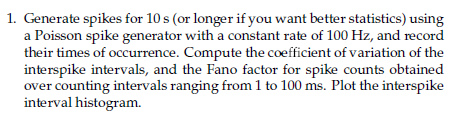

In [ ]:
t = 100
rate = 100
t_steps = 1000 # n steps per second, dt = 1/n, r = 100
p = rate * 1/t_steps

N = t_steps * t
xrands = np.random.rand(N)
probs = p*np.ones(N)

spikes = np.zeros(N)
spikes[(probs - xrands)>0]=1

sum(spikes)

10068.0

In [ ]:
intervals = []
count = 0
for i,val in enumerate(spikes):
  if spikes[i] == 0:
    count += 1
  elif spikes[i] == 1:
    intervals.append(count)
    count = 0

intervals = np.array(intervals)/t_steps

In [ ]:
def c_v_sqr(intervals):
  return np.sqrt(np.var(intervals)/(np.mean(intervals))**2)

c_v_sqr(intervals)

1.0494878587468484

In [ ]:
def fano(spikes):
  return np.var(spikes)/np.mean(spikes)

fano(spikes)

0.8993200000000001

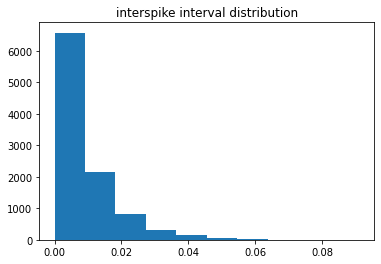

In [ ]:
plt.hist(intervals)
plt.title('interspike interval distribution')
plt.show()

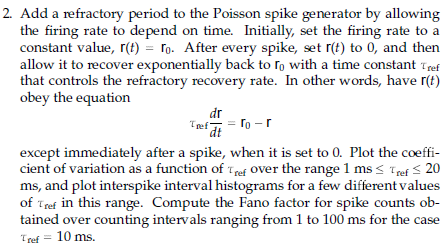

Rewriting the differential equation, after a spike the rate will develop according to:
$$ r(t) = r_0 \Big[1 - exp\big[-\frac{t}{\tau_{ref}}\big]\Big]$$

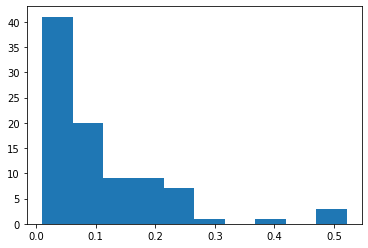

In [ ]:
t = 10
rate_0 = 10
t_steps = 1000 # n steps per second, dt = 1/n, r = 100
N = t_steps * t

taus = np.linspace(0.001, 0.020, 5)
c_vs = []

tau_ref = 0.010
t_spike = []
rates = []
t_count = 0
spikes = 0

for i in range(N):
  t_count += 1/t_steps
  r = rate_0 * ( 1 - np.exp(-t_count/tau_ref))
  rates.append(r)
  p = r * 1/t_steps
  xrand = np.random.rand()
  if p>xrand:
    spikes += 1
    t_spike.append(t_count)
    t_count = 0
  
c_vs.append(c_v_sqr(t_spike))
plt.hist(t_spike)
plt.show()

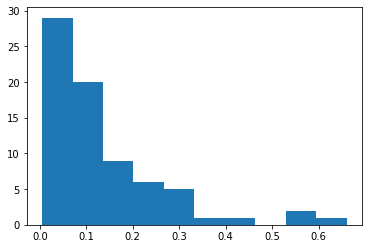

In [ ]:
t = 10
rate_0 = 10
t_steps = 1000 # n steps per second, dt = 1/n, r = 100
N = t_steps * t

taus = np.linspace(0.001, 0.020, 5)
c_vs = []

tau_ref = 0.010
t_spike = []
rates = []
t_count = 0
spikes = 0

for i in range(N):
  t_count += 1/t_steps
  r = rate_0 * ( 1 - np.exp(-t_count/tau_ref))
  rates.append(r)
  p = r * 1/t_steps
  xrand = np.random.rand()
  if p>xrand:
    spikes += 1
    t_spike.append(t_count)
    t_count = 0
  
c_vs.append(c_v_sqr(t_spike))
plt.hist(t_spike)
plt.show()

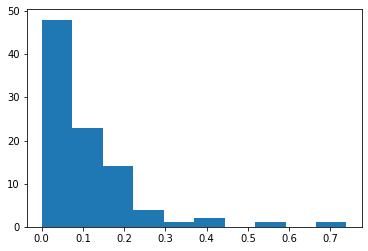

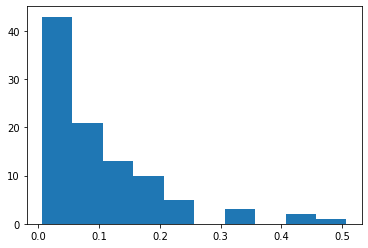

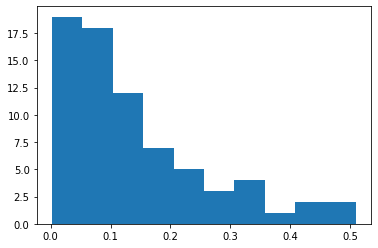

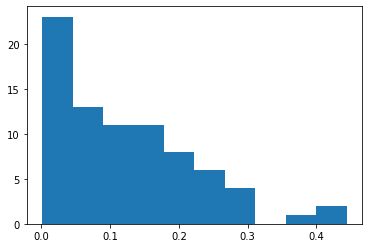

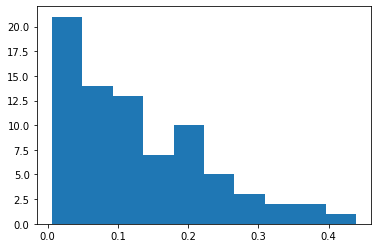

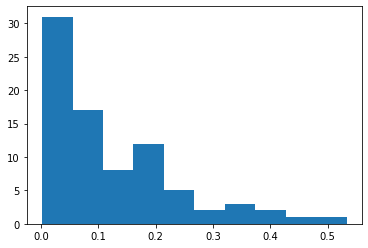

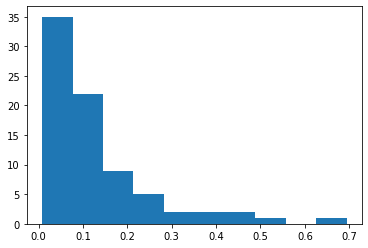

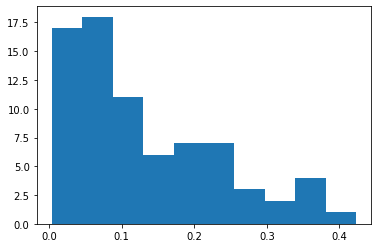

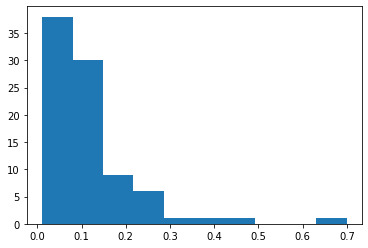

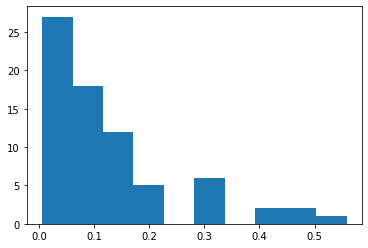

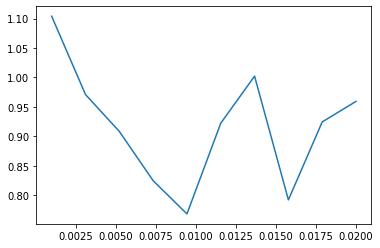

In [ ]:
t = 10
rate_0 = 10
t_steps = 1000 # n steps per second, dt = 1/n, r = 100
N = t_steps * t

taus = np.linspace(0.001, 0.020, 10)
c_vs = []

for tau_ref in taus:
  t_spike = []
  rates = []
  t_count = 0
  spikes = 0

  for i in range(N):
    t_count += 1/t_steps
    r = rate_0 * ( 1 - np.exp(-t_count/tau_ref))
    rates.append(r)
    p = r * 1/t_steps
    xrand = np.random.rand()
    if p>xrand:
      spikes += 1
      t_spike.append(t_count)
      t_count = 0
    
  c_vs.append(c_v_sqr(t_spike))
  plt.hist(t_spike)
  plt.show()

plt.plot(taus,c_vs)

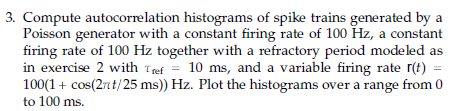

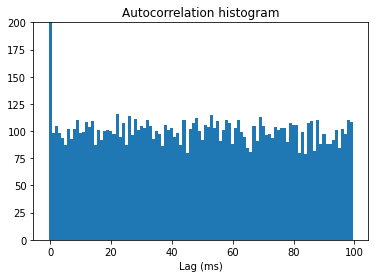

In [3]:
from numpy.core.multiarray import concatenate
#case 1

#parameters
t = 10
rate = 100
t_steps = 1000 # n steps per second, dt = 1/n, r = 100
N = t_steps * t
bin_size = 1
max_lag = 100

#spike train
p = rate/ t_steps
spikes = np.random.rand(N) < p

#compute autocorrelation
lags = np.arange(0, max_lag + bin_size, bin_size)
x_bins = len(lags) - 1
acf = np.zeros(x_bins)
for i in range(x_bins):
  lag = lags[i]
  acf[i] = np.sum(spikes[:N-lag] * spikes[lag:N])

#plot histograms
plt.bar(lags[:-1], acf, width=bin_size)
plt.xlabel('Lag (ms)')
plt.title('Autocorrelation histogram')
plt.ylim([0, 200])
plt.show()


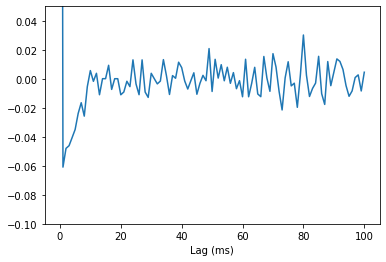

In [4]:
#Case 2
# this case needs a refractory period to the spike generator

#parameters
t = 10  
rate_0 = 100
tau_ref = 0.01  

#autocorrelation
def autocorrelation(spikes, lag):
    n = len(spikes)
    mean = np.mean(spikes)
    correlation = np.correlate(spikes-mean, spikes-mean, mode='same') / (n * mean * (1-mean))
    return correlation[n//2 + lag]

# function to generate spikes with refractory period
def generate_spikes_ref(t, rate_0, tau_ref):
    t_steps = 1000
    N = t_steps * t
    spikes = np.zeros(N, dtype=int)
    t_spike = 0

    for i in range(N):
        r = rate_0 * (1 - np.exp(-t_spike/tau_ref))
        p = r * 1/t_steps
        xrand = np.random.rand()
        if p > xrand:
            spikes[i] = 1
            t_spike = 0
        else:
            t_spike += 1/t_steps

    return spikes

# Spikes with refractory period
spikes_ref = generate_spikes_ref(t, rate_0, tau_ref)

# compute autocorrelation function for lags 0 to 100 ms
lags = np.arange(101)
autocorr_ref = [autocorrelation(spikes_ref, lag) for lag in lags]

# plot autocorrelation function
plt.plot(lags, autocorr_ref)
plt.xlabel('Lag (ms)')
plt.ylim([-0.1,0.05])
plt.show()



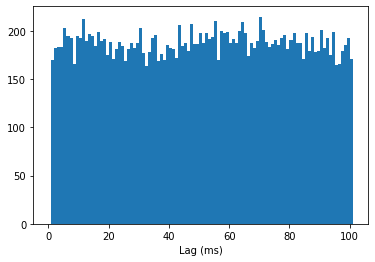

In [ ]:
from numpy.core.multiarray import concatenate
# Third case
t = 10 
t_steps = 1000 
N = t_steps * t # total number of time steps
dt = 1/t_steps 

#defining the variable firing rate r(t)
def rate(t):
  return 100*(1 + np.cos(2*np.pi*t/25))

spikes = np.zeros(N)

#generating spikes
for i in range(N):
    p = rate(i*dt) * dt
    if np.random.rand() < p:
        spikes[i] = 1

max_lag = 100 # maximum time lag
bin_size = 1 # bin size
max_bins = int(max_lag / bin_size) + 1
autocorr = np.zeros(max_bins)
for i in range(N):
    if spikes[i] == 1:
        for lag in range(1, max_lag+1, bin_size):
            if i+lag < N:
                autocorr[int(lag/bin_size)] += spikes[i+lag]

time_lags = np.arange(0, max_lag+bin_size, bin_size)
plt.bar(time_lags, autocorr, width=bin_size, align='edge')
plt.xlabel('Lag (ms)')
plt.show()


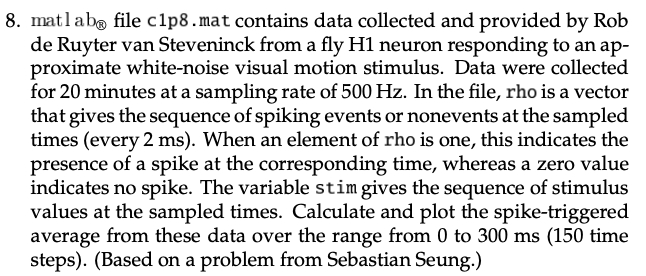

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving c1p8.mat to c1p8.mat


In [ ]:
import scipy.io
mat = scipy.io.loadmat('c1p8.mat')

In [ ]:
stim = mat['stim']
rho = mat['rho']

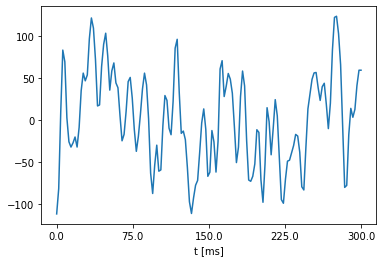

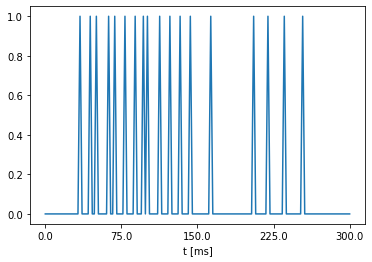

In [ ]:
# To get an idea of what is happening here, we plot the first 150 items
t = np.linspace(0,150,150)
stim1 = stim[0:150]
rho1 = rho[0:150]
plt.plot(t,stim1)
plt.xticks(np.linspace(0,150,5), np.linspace(0,300,5))
plt.xlabel('t [ms]')
plt.show()
print('')
plt.plot(t,rho1)
plt.xticks(np.linspace(0,150,5), np.linspace(0,300,5))
plt.xlabel('t [ms]')
plt.show()

In [ ]:
# I start in 150 in order to not get negative index values
stim1 = stim[150:len(stim)] 
rho1 = rho[150:len(stim)]

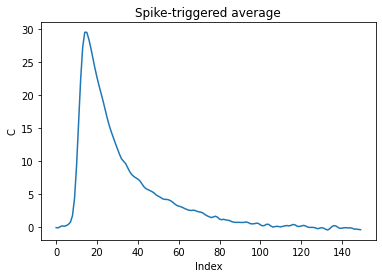

In [ ]:
firing_index = np.nonzero(rho1)
avg =[]

for i in range(0,150):
  avg.append(np.mean(stim1[ firing_index[0][:] - i ]))

plt.plot(avg)
plt.ylabel('C')
plt.xlabel('Index')
plt.title('Spike-triggered average')
plt.show()

We can infer from this graph that the bigger amount of shown stimuli is about 20 time steps (40ms) before the neuron fires. Therefore, there is a delay in the processing. 